# 05_SSD_inference.ipynb

Object detection and recognition test using trained SSD model.

### This uses utils.ssd_predict_show

In [1]:
import cv2  # OpenCV library
import matplotlib.pyplot as plt 
import numpy as np
import torch

%matplotlib inline

### Execute inference

In [2]:
from utils.ssd_model import SSD

voc_classes = ['aeroplane', 'bicycle', 'bird', 'boat',
               'bottle', 'bus', 'car', 'cat', 'chair',
               'cow', 'diningtable', 'dog', 'horse',
               'motorbike', 'person', 'pottedplant',
               'sheep', 'sofa', 'train', 'tvmonitor']

# SSD300 config (same as before)
ssd_cfg = {
    'num_classes': 21,  
    'input_size': 300, 
    'bbox_aspect_num': [4, 6, 6, 6, 4, 4],  
    'feature_maps': [38, 19, 10, 5, 3, 1],  
    'steps': [8, 16, 32, 64, 100, 300],  
    'min_sizes': [30, 60, 111, 162, 213, 264], 
    'max_sizes': [60, 111, 162, 213, 264, 315], 
    'aspect_ratios': [[2], [2, 3], [2, 3], [2, 3], [2], [2]],
}

net = SSD(phase="inference", cfg=ssd_cfg)


net_weights = torch.load('./weights/ssd300_mAP_77.43_v2.pth',
                        map_location={'cuda:0': 'cpu'})

net.load_state_dict(net_weights)

print('finish network configuration: loaded weight files')


ネットワーク設定完了：学習済みの重みをロードしました


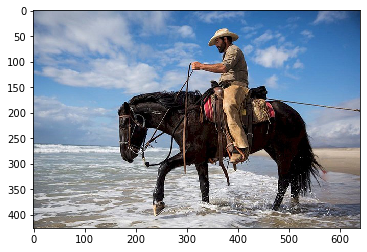

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


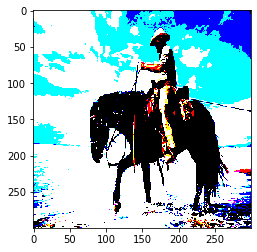

torch.Size([1, 21, 200, 5])
tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],

         [[0.0195, 0.0123, 0.8326, 0.1496, 0.9731],
          [0.0116, 0.4305, 0.2307, 0.5105, 0.3969],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],

         [[0.0676, 0.7309, 0.7858, 0.8505, 0.9432],
          [0.0477, 0.2562, 0.3204, 0.8606, 0.9028],
          [0.0237, 0.4258, 0.3763, 0.5023, 0.5444],
          ...,
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.00

..\torch\csrc\autograd\python_function.cpp:638: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
..\torch\csrc\autograd\python_function.cpp:664: UserWarning: Legacy autograd function object was called twice.  You will probably get incorrect gradients from this computation, as the saved tensors from the second invocation will clobber the saved tensors from the first invocation.  Please consider rewriting your autograd function in the modern style; for information on the new format, please see: https://pytorch.org/docs/stable/notes/extending.html#extending-torch-autograd


In [20]:
from utils.ssd_model import DataTransform

# 1. load image (you can choose your own file) *****
image_file_path = "./data/cowboy-757575_640.jpg"
img = cv2.imread(image_file_path)  # [height][width][color=BGR]
height, width, channels = img.shape  # get image size

# 2. display image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# 3. create pre-processing class 
color_mean = (104, 117, 123) 
input_size = 300 
transform = DataTransform(input_size, color_mean)

# 4. pre-process
phase = "val"
img_transformed, boxes, labels = transform(
    img, phase, "", "")  # no annotation (in inference mode)
img = torch.from_numpy(img_transformed[:, :, (2, 1, 0)]).permute(2, 0, 1)

#plt.imshow(img_transformed)
plt.imshow(cv2.cvtColor(img_transformed, cv2.COLOR_BGR2RGB))
plt.show()

# 5. use SSD
net.eval()  # set evaluation mode 
x = img.unsqueeze(0)  # mini-batch=1：torch.Size([1, 3, 300, 300])
detections = net(x)

print(detections.shape)
print(detections)

# output : torch.Size([batch_num, 21, 200, 5])
#  =（batch_num, num class, top200, normalized BBox info）
#     normalized BBox info :（conf, xmin, ymin, xmax, ymax）


..\torch\csrc\autograd\python_function.cpp:638: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
..\torch\csrc\autograd\python_function.cpp:664: UserWarning: Legacy autograd function object was called twice.  You will probably get incorrect gradients from this computation, as the saved tensors from the second invocation will clobber the saved tensors from the first invocation.  Please consider rewriting your autograd function in the modern style; for information on the new format, please see: https://pytorch.org/docs/stable/notes/extending.html#extending-torch-autograd


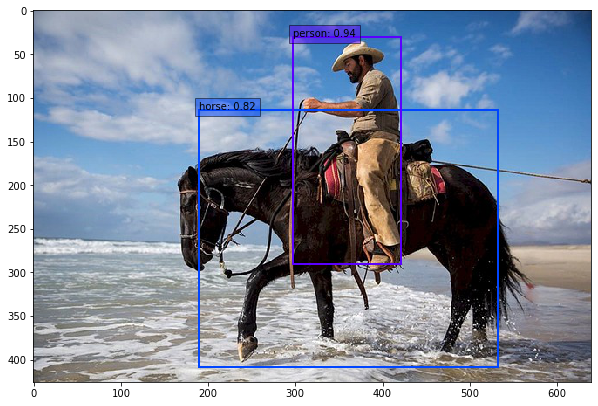

In [13]:
# prediction for input image
from utils.ssd_predict_show import SSDPredictShow

# filepath
image_file_path = "./data/cowboy-757575_640.jpg"


# display evaluation results
ssd = SSDPredictShow(eval_categories=voc_classes, net=net)
ssd.show(image_file_path, data_confidence_level=0.6)

